In [1]:
from __future__ import print_function, division
%matplotlib inline


import os

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [2]:
import numpy as np
import modisco
import theano
print("Theano version:",theano.__version__)
import sys
print (sys.version)

Theano version: 1.0.2
2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


laplace for the tasks:
![laplace_b 0](figures/laplace_0.png)
![laplace_b 1](figures/laplace_1.png)
![laplace_b 2](figures/laplace_2.png)


[logs](logs/modisco.txt)


Metaclusters heatmap


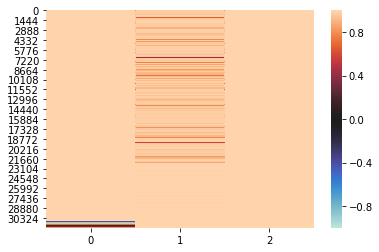

metacluster_0
activity pattern: [1 0 1]
pattern_0
total seqlets: 17903
Task 0 actual importance scores:


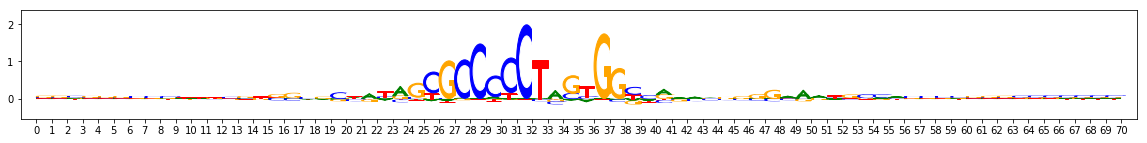

Task 1 actual importance scores:


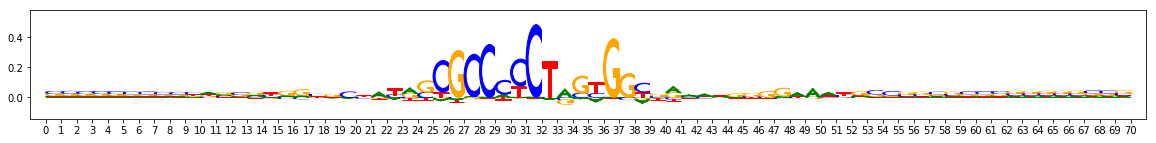

Task 2 actual importance scores:


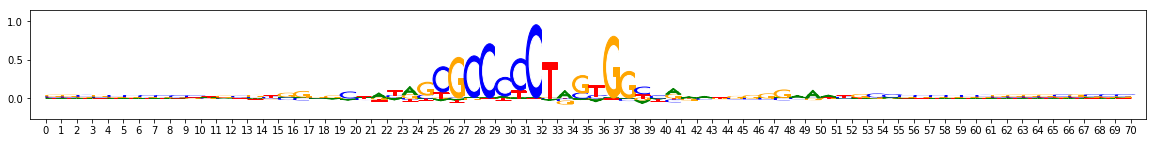

onehot, fwd and rev:


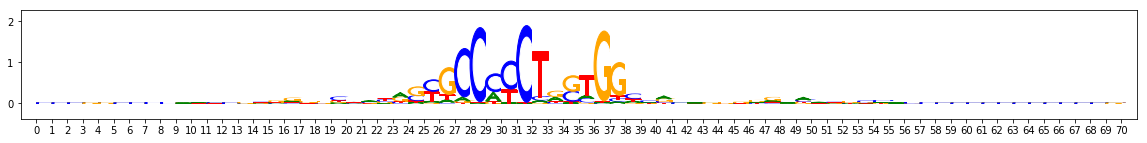

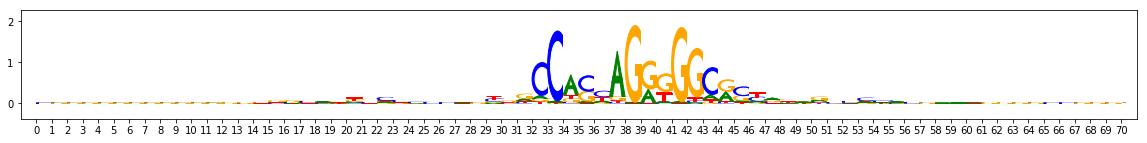

pattern_1
total seqlets: 919
Task 0 actual importance scores:


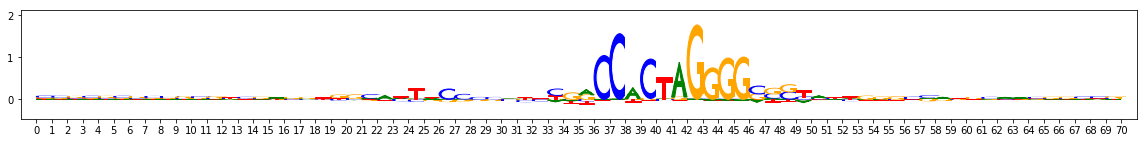

Task 1 actual importance scores:


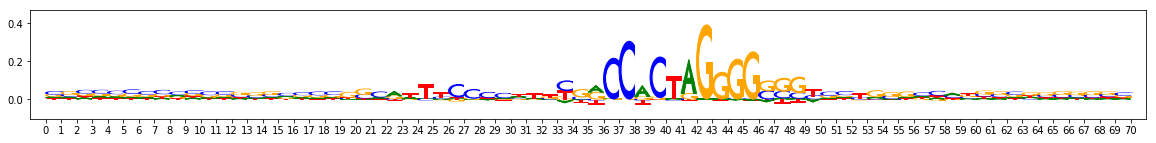

Task 2 actual importance scores:


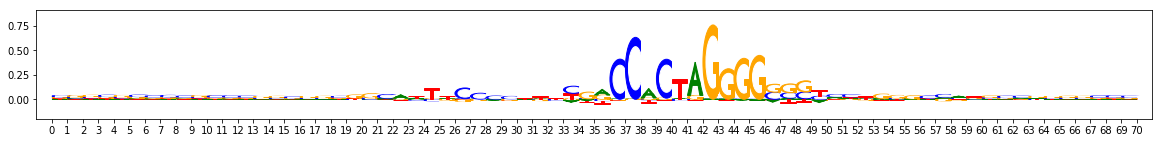

onehot, fwd and rev:


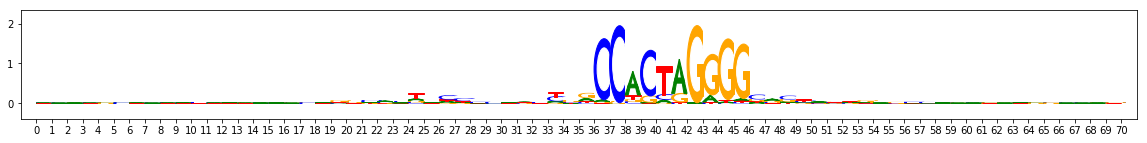

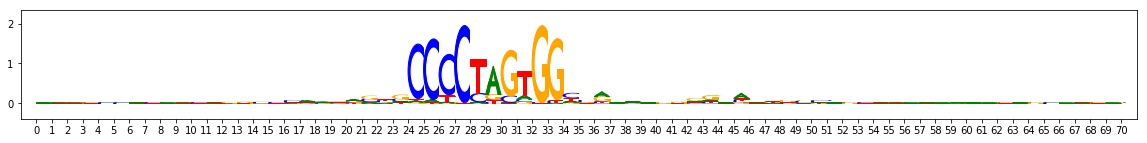

pattern_2
total seqlets: 169
Task 0 actual importance scores:


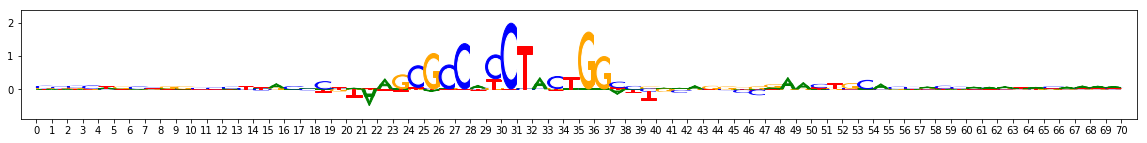

Task 1 actual importance scores:


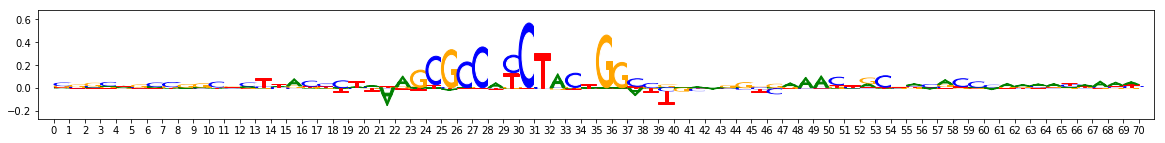

Task 2 actual importance scores:


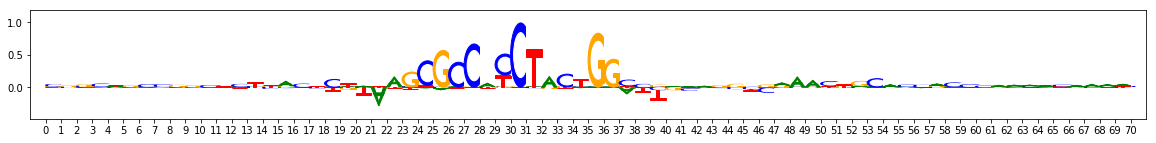

onehot, fwd and rev:


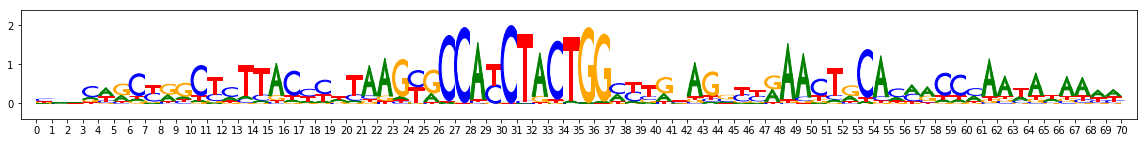

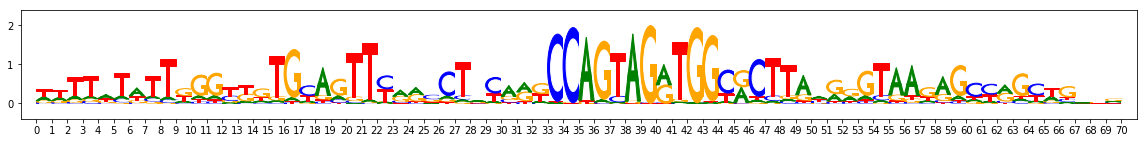

metacluster_1
activity pattern: [1 1 1]
pattern_0
total seqlets: 7925
Task 0 actual importance scores:


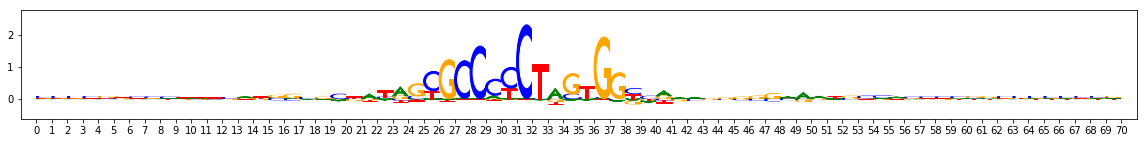

Task 1 actual importance scores:


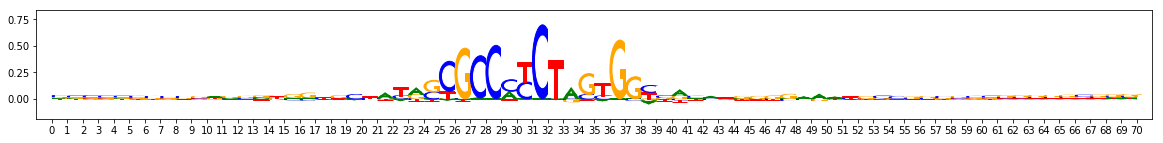

Task 2 actual importance scores:


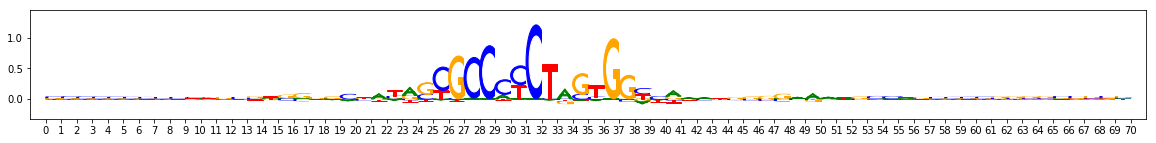

onehot, fwd and rev:


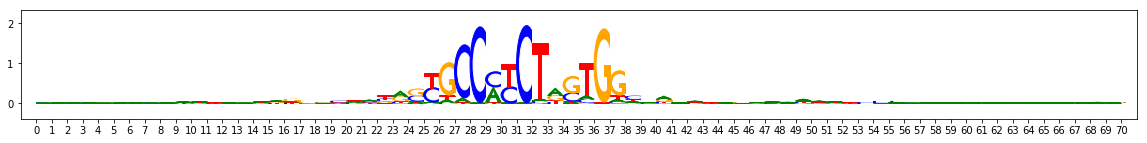

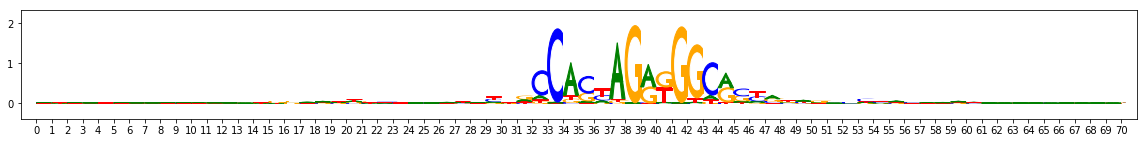

pattern_1
total seqlets: 122
Task 0 actual importance scores:


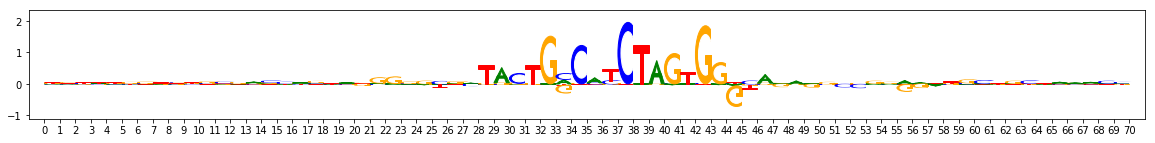

Task 1 actual importance scores:


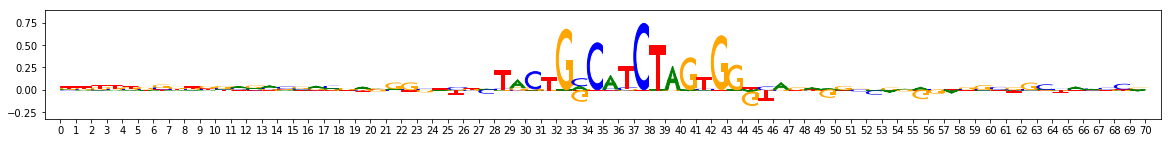

Task 2 actual importance scores:


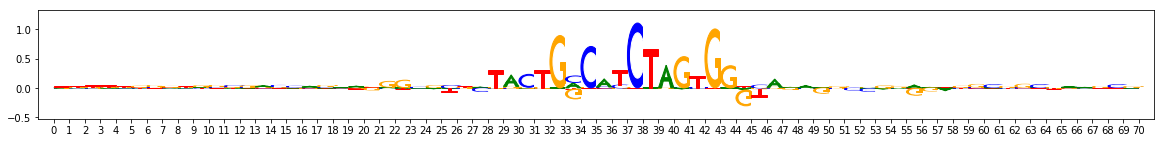

onehot, fwd and rev:


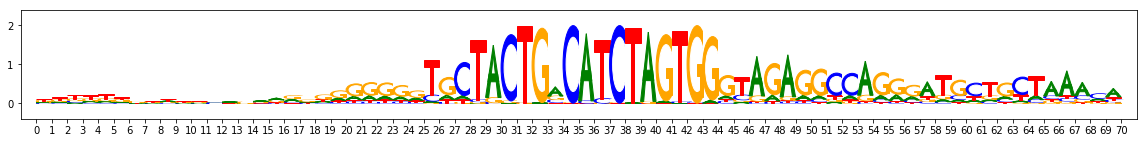

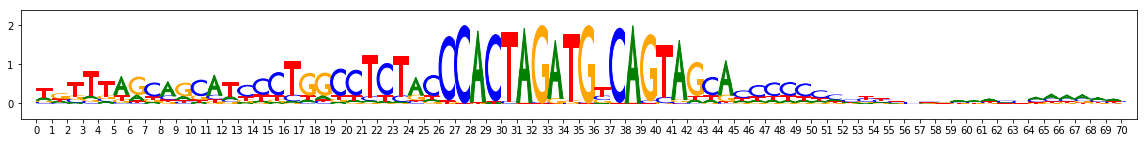

pattern_2
total seqlets: 61
Task 0 actual importance scores:


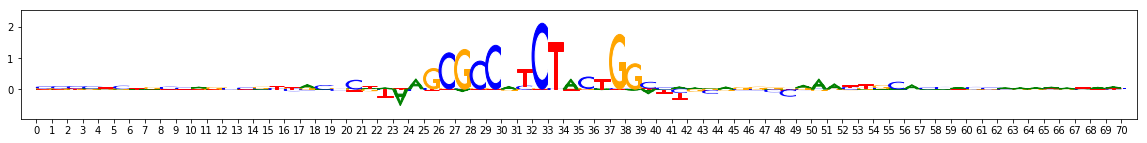

Task 1 actual importance scores:


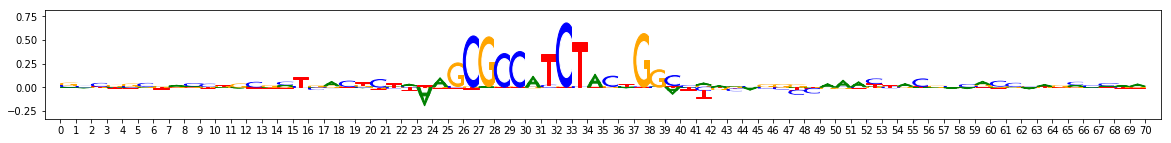

Task 2 actual importance scores:


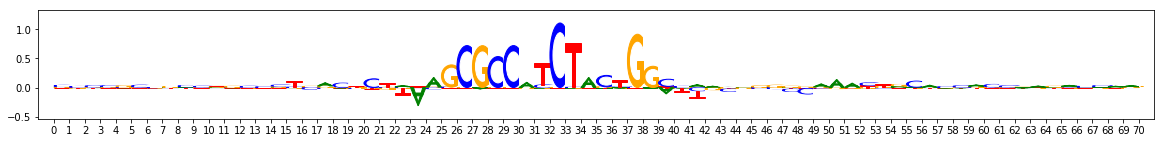

onehot, fwd and rev:


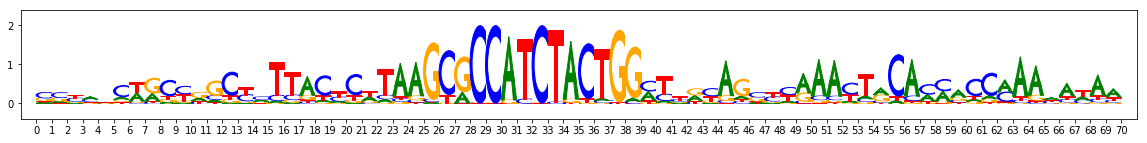

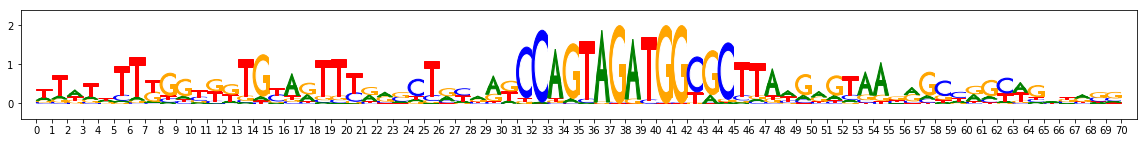

metacluster_2
activity pattern: [0 1 1]
pattern_0
total seqlets: 587
Task 0 actual importance scores:


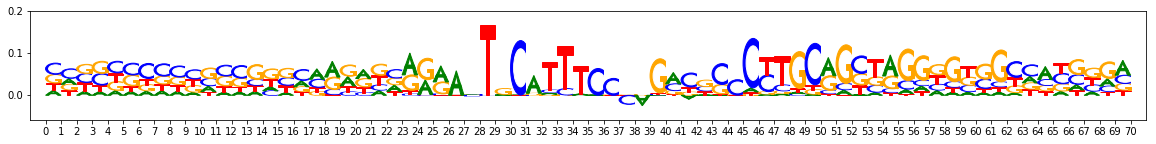

Task 1 actual importance scores:


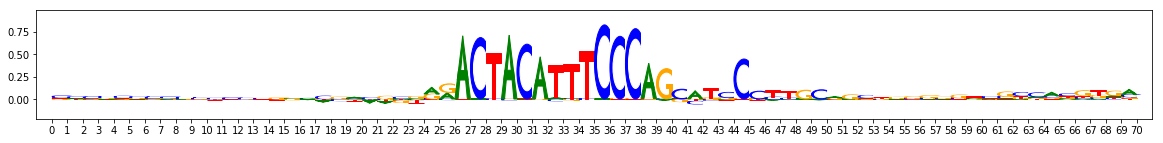

Task 2 actual importance scores:


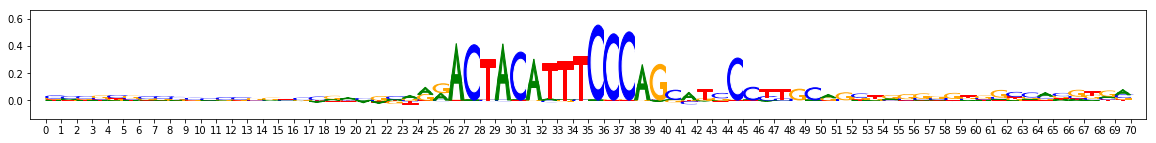

onehot, fwd and rev:


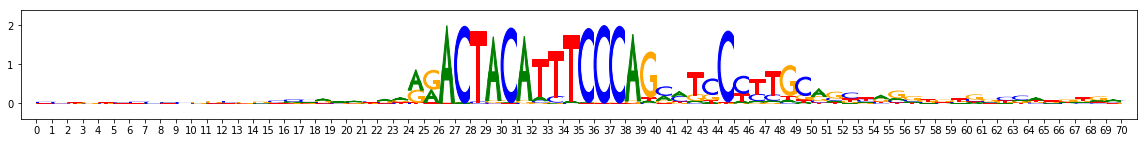

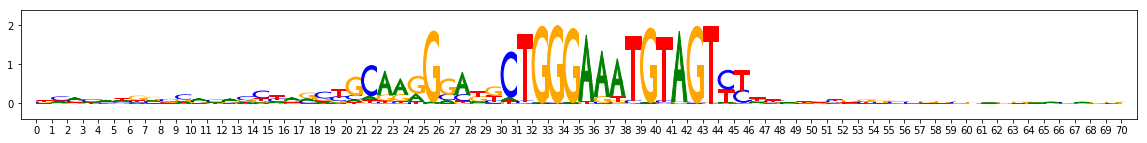

pattern_1
total seqlets: 42
Task 0 actual importance scores:


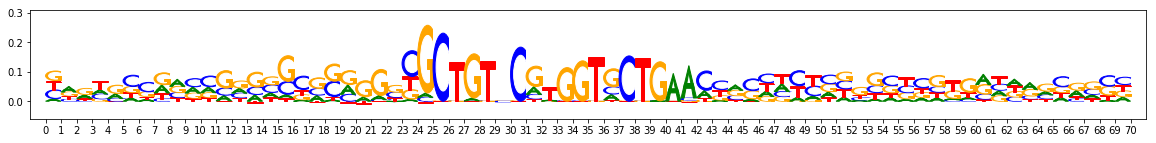

Task 1 actual importance scores:


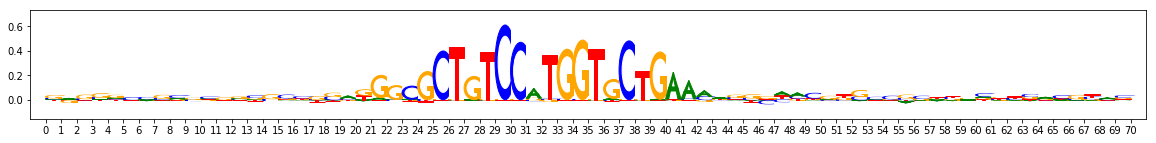

Task 2 actual importance scores:


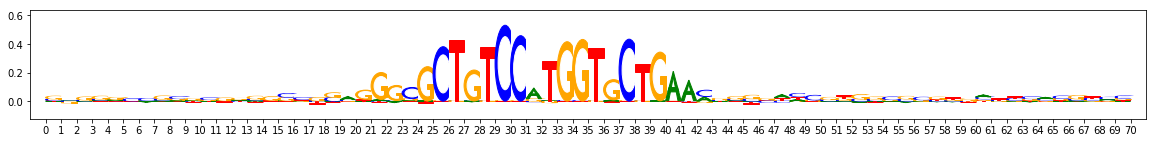

onehot, fwd and rev:


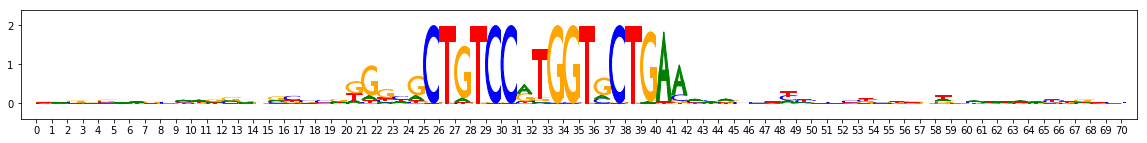

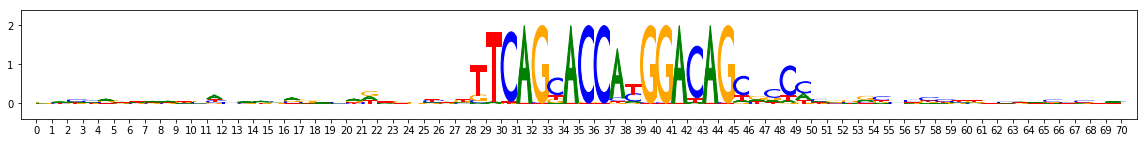

In [3]:
import h5py

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5")
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []


#metacluster_names = list(hdf5_results["metaclustering_results"]["all_metacluster_names"][:])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = (list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:]))
    for pattern_name in all_pattern_names:
        print(pattern_name)
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        #print("Task 0 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        print("Task 1 actual importance scores:")
        viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        print("Task 2 actual importance scores:")
        viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()